Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Mohammed Salama"
COLLABORATORS = ""

---

### <font color="brown">Data Management for Data Science</font>
### <font color="brown">Lab 02: Dictionaries, File Handling and Inverted Index </font>
### <font color="brown">Due Date : October 06, 2024 11.59PM </font>
You can still submit 48 hours late. But you will only have 4 total late days for all assignments, max 2 late days per assignment. Additional late days will be penalized.

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Mohammed Salama<br>
<b>NetID</b>: mhs170<br>
<b>Recitation #</b>: 8<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://studentconduct.rutgers.edu/processes/academic-integrity">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: MS      (eg: AG for Andy Guna)

## Important
We will post any updates to this assignment on piazza. if you need clarifications, please post on piazza. We will cover some of the things needed in the recitations and lectures. 

## Problem 1 - US Population Growth Analysis
In this problem, we will read a file of US population growth predictions and do some analysis.  

### Task 1.1 - Read and Clean data file
The data file given at **/srv/shared/united-states-population-2024-01-10.csv** contains data on US population growth. First we need to clean this file by removing header information. What we really need are the date, population, annual growth rate. Write the code to clean the file, by removing the header lines and storing the file as **united-states-population-2024-01-10-cleaned.csv** in your local folder. After removing header information, it should look like this.

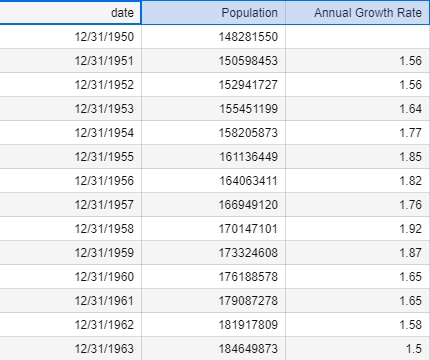

In [2]:
## your code here

with open('/srv/shared/united-states-population-2024-01-10.csv', 'r') as file1:
    lines = file1.readlines()

clean_lines = lines[15:]

with open('united-states-population-2024-01-10-cleaned.csv', 'w') as file2:
    file2.writelines(clean_lines)


## print the first 10 lines of the new file to show that file has been cleaned.

with open('united-states-population-2024-01-10-cleaned.csv', 'r') as file3:
    for i in range(10):
        print(file3.readline())
        


date, Population, Annual Growth Rate

12/31/1950,148281550,

12/31/1951,150598453,1.56

12/31/1952,152941727,1.56

12/31/1953,155451199,1.64

12/31/1954,158205873,1.77

12/31/1955,161136449,1.85

12/31/1956,164063411,1.82

12/31/1957,166949120,1.76

12/31/1958,170147101,1.92



### Task 1.2 - Patterns in growth rate change
How has the U.S. population growth rate changed over time?

Analyze trends in the annual growth rate to identify periods of rapid population expansion or decline. Identify the decade of **highest expansion** and the decade of **slowest expansion**. If there are more than one decade, list them all.


In [3]:
## your code here

my_dict = {}

with open('united-states-population-2024-01-10-cleaned.csv', 'r') as file:
    next(file)
    for line in file:
        columns = line.strip().split(',')
        date = columns[0]
        population = float(columns[1])
        year = date.split('/')[2]
        my_dict[year] = population

first_and_last_year = {}
year_count = {}

for year, population in sorted(my_dict.items()):
    decade = f"{year[:3]}0s"
    if decade not in first_and_last_year:
        first_and_last_year[decade] = {'first_year': population, 'last_year': population}
        year_count[decade] = 1
    else:
        first_and_last_year[decade]['last_year'] = population
        year_count[decade] += 1
        
growth_rate_by_decade = {}

for decade, populations in first_and_last_year.items():
    if year_count[decade] == 10:
        first_year_pop = populations['first_year']
        last_year_pop = populations['last_year']
        growth_rate = ((last_year_pop - first_year_pop) / first_year_pop) * 100
        growth_rate_by_decade[decade] = growth_rate

highest_expansion = max(growth_rate_by_decade.values())
lowest_expansion = min(growth_rate_by_decade.values())

keys_with_highest_expansion = [k for k, v in growth_rate_by_decade.items() if v == highest_expansion]
keys_with_lowest_expansion = [k for k, v in growth_rate_by_decade.items() if v == lowest_expansion]

print(f"Decades with highest expansion: {keys_with_highest_expansion}")
print(f"Decades with lowest expansion: {keys_with_lowest_expansion}")

Decades with highest expansion: ['1950s']
Decades with lowest expansion: ['2090s']


##### Your Analysis 
Based on what you observe, describe **factors** that can be attributed to highest or lowest growth rate decades. You must do web research to find some answers. Please cite the sources of information. This should be less than 200 words.  

One of the factors that can be attributed to the highest or lowest growth rate decades is social and cultural norms. Changing patterns in social and cultural norms can impact birth rates, which are a significant determinant of population growth. For instance, increased acceptance of smaller families or delayed marriages can contribute to lower growth rate decades.

Another factor is education and contraceptive Use. Increases in educational attainment, particularly among women, are often associated with lower birth rates. Higher education levels usually coincide with increased awareness and use of contraceptives, further contributing to lower population growth during those periods. 

Finally, economic conditions such as recessions, wage levels, and job security can significantly impact birth rates. Difficult economic times may lead couples to delay having children or choose smaller families, resulting in lower population growth during those periods. Conversely, periods of economic prosperity may see higher birth rates.

Sources:

https://www.cdc.gov/nchs/hus/topics/births.htm

https://www.milbank.org/quarterly/opinions/the-social-determinants-of-declining-birth-rates-in-the-united-states-implications-for-population-health-and-public-policy/

### Task 1.3 - Correlation
Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. It is often quantified using the correlation coefficient, typically ranging between -1 and 1:

1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally.

-1 indicates a perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.

0 indicates no correlation, meaning there is no linear relationship between the two variables.

In practical terms, the correlation helps to understand whether and how strongly pairs of variables are related. For instance:

A positive correlation means that both variables move in the same direction.
A negative correlation means that as one variable increases, the other decreases.

You can find the correlation between two variables in Python using the pandas library's corr() method, which computes the Pearson correlation coefficient by default. Read the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html



In [4]:
# your code here to find the correlation between the U.S. population size and the annual growth rate 

import pandas as pd

df = pd.read_csv('united-states-population-2024-01-10-cleaned.csv').fillna(0)

correlation = df[' Population'].corr(df[' Annual Growth Rate'])
print(f"correlation coeffient between the U.S population size and the annual growth rate is {correlation}")

correlation coeffient between the U.S population size and the annual growth rate is -0.913259969344791


#### Summarize
Based on correlation observations above, what can you conclude. Write your own summary in less than 100 words. If you do web research, add the sources.

Based on the computed correlation, we can conclude that the annual growth rate decreased as the population increased. This could be because there's a general decreasing trend in annual growth rate in the US. However, we get a value close to -1 because the population never decreases.

## Problem 2 - Inverted Index

You are given a large collection of text files (e.g., millions of files or a large dataset). The goal is to build a dictionary data structure that can quickly return the list of files that contain a given word or phrase. For example, something like this.

{
    'python': ['file1.txt', 'file5.txt', 'file42.txt'],
    'machine': ['file2.txt', 'file5.txt'],
    'learning': ['file2.txt', 'file10.txt']
}

### Task 2.1 - Process the files
The folder **/srv/shared/inverted_index_files** contains some text files you are trying to build an index on. Process each file, and store the words as a list. Before adding to the list do the following. 

**Lowercase conversion:** Convert all text to lowercase to ensure uniformity (e.g., "Data" and "data" are treated the same).

**Remove punctuation:** Strip out punctuation marks like commas, periods, and exclamation points.

**Remove numbers:** Depending on the use case, numbers might need to be removed if they're not meaningful in the context.

**Remove stopwords:** Words like "and," "the," and "in" that don't contribute much meaning can be removed (this step is common in NLP tasks).

**Remove special characters:** Characters like #, @, and others may be unnecessary unless they're relevant.

Add each list to a **master list** (list of lists)

In [9]:
## write your code here
with open('/srv/shared/stop_words.txt', 'r') as stop_words:
    list_of_stop_words = stop_words.read().split()

def clean_files(filepath):
    #alice_list = []
    special_characters = set('—!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”‘’')
    punctuation = set('.,!?')
    with open(filepath, 'r', encoding='utf-8-sig') as file:
         content = file.read()
    # lower case
    content = content.lower()
    
    # remove punctuation, numbers, and special char
    cleaned_lines = []
    for char in content:
        if char not in special_characters and char not in punctuation and not char.isdigit():
            cleaned_lines.append(char)
    content = ''.join(cleaned_lines).split()
    final_version = [word for word in content if word not in list_of_stop_words]
    return final_version


file_names = [
    'Alice_Adventures.txt',
    'Moby_Dick.txt',
    'pride_and_prejudice.txt',
    'Romeo_and_Juliet.txt',
    'Room_with_a_View.txt',
    'Scarlet_Letter.txt'
]

sorted_file_names = sorted(file_names, key=str.lower)
master_list = []
    
for file_name in sorted_file_names:
    file_path = f'/srv/shared/inverted_index_files/{file_name}'
    answer = clean_files(file_path)
    master_list.append(answer)

print(master_list[0][:200])



['project', 'gutenberg', 'ebook', 'alices', 'adventures', 'wonderland', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'alices', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'june', 'ebook', 'recently', 'updated', 'february', 'language', 'english', 'credits', 'arthur', 'dibianca', 'david', 'widger', 'start', 'project', 'gutenberg', 'ebook', 'alices', 'adventures', 'wonderland', 'illustration', 'alices', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bil

### Task 2.2 - Build the inverted Index
Using the master list, build a dictionary, where, key is a word and value is which files that word appears. eg. { 'python': ['file1.txt', 'file5.txt', 'file42.txt'], 'machine': ['file2.txt', 'file5.txt'], 'learning': ['file2.txt', 'file10.txt'] }

In [10]:
## write your code here

word_dict = {}

for file_name in sorted_file_names:
    file_path = f'/srv/shared/inverted_index_files/{file_name}'
    answer = clean_files(file_path)
    
    for word in answer:
        if word in word_dict:
            if file_name not in word_dict[word]:
                word_dict[word].append(file_name)
        else:
            word_dict[word] = [file_name]

print(f"project: {word_dict['project']}")
print(f"gutenberg: {word_dict['gutenberg']}")
print(f"ebook: {word_dict['ebook']}")
print(f"pride: {word_dict['pride']}")
print(f"use: {word_dict['use']}")
            
#for word, files in list(word_dict.items())[:50]:
#    print(f'{word}: {files}')



project: ['Alice_Adventures.txt', 'Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']
gutenberg: ['Alice_Adventures.txt', 'Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']
ebook: ['Alice_Adventures.txt', 'Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']
pride: ['Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']
use: ['Alice_Adventures.txt', 'Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']


### Task 2.3 - Searching the index
Write code where you **interactively** ask a user to enter a word and show the files where that word appears. 

In [11]:
## write your code here

while True:
    user_input = input('Enter a word or type "exit" to quit')

    if user_input == 'exit':
        print("Exiting")
        break
    if user_input == '':
        print('No word entered\nPlease enter a valid word')
        continue
    if user_input in word_dict:
        print(word_dict[user_input])
    else:
        print('Word not found')
    

Enter a word or type "exit" to quit hel


Word not found


Enter a word or type "exit" to quit boy


['Alice_Adventures.txt', 'Moby_Dick.txt', 'pride_and_prejudice.txt', 'Romeo_and_Juliet.txt', 'Room_with_a_View.txt', 'Scarlet_Letter.txt']


Enter a word or type "exit" to quit exit


Exiting


### Submission Instructions
Rename the lab as netID_Lab02.ipynb and submit to codebench. (eg: adg133_Lab02.ipynb)